<a href="https://colab.research.google.com/github/k1151msarandega/QuCode-21-Days-of-Quantum-Challenge-Diary/blob/main/Day03_Physics_Quantum_vs_Classical_Mechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 03 — Physics: Quantum vs. Classical Mechanics

> _QuCode 21 Days of Quantum Challenge — Learning notebook_
>
> **Date:** 2025-09-03  
> **Author:** Kudzai Musarandega  
> **Tags:** quantum, learning, challenge, day-03
>
> **Learning objectives**
> - Explain superposition in plain language, with one clean equation and one visual.
> - Contrast a **quantum superposition** with a **classical mixture**.
> - Describe wave-particle duality and the double-slit result for single electrons.
> - State the role of the Schrödinger equation and the Born rule.
> - Use de Broglie’s relation to estimate when wave effects are observable.
>
> **Key takeaways (summary-first)**
> - **Superposition:** a quantum state can be a linear combination of basis states. For a qubit, $$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle,\quad |\alpha|^2+|\beta|^2=1.$$
> - **Not the same as ignorance:** a mixed “either 0 or 1” state has no phase coherence; a superposition does. Coherence shows up as **interference**.
> - **Wave-particle duality:** particles propagate like waves, but detection events are localised. Patterns come from probabilities, not from little ripples of stuff.
> - **de Broglie wavelength:** $\lambda=h/p$. Bigger mass or momentum, smaller $\lambda$ → classical behaviour.
> - **Schrödinger equation:** evolves the wavefunction $\psi$; the **Born rule** turns $|\psi|^2$ into detection probabilities.
> - **Cat box lesson:** macroscopic superpositions are rapidly destroyed by **decoherence** (entanglement with the environment), which is why we do not see “alive+dead” cats.


## Resources
- **Official/Assigned:**
    - [Ted-Ed: Schrödinger's cat - A thought experiment in quantum mechanics - Chad Orzel](https://www.youtube.com/watch?v=UjaAxUO6-Uw)
    - [Perimeter Institute for Theoretical Physics: Superposition Explained (Schrödinger's Cat)](https://www.youtube.com/watch?v=IHDMJqJHCQg)
    - [SandboxAQ: Quantum Explained – Superposition](https://www.youtube.com/watch?v=kmCZMLfo_ak)
    - [Perimeter Institute for Theoretical Physics: Wave Particle Duality Explained](https://www.youtube.com/watch?v=DfQH3o6dKss)
    - [The Analyst: Every QUANTUM Physics Concept Explained in 10 Minutes](https://www.youtube.com/watch?v=M7Ry9W-T3fs)
    - [Professor Dave Explains: Quantum Mechanics and the Schrödinger Equation](https://www.youtube.com/watch?v=O6g-7rUgrdg)
- **Extra reading:** Add one or two carefully chosen extras
- **Original notes:** If you derived or proved something, link or write it here


In [ ]:
# %% [markdown]
# ### Environment setup (Colab)
# If you are running on Colab for the first time today, uncomment to install.
# This cell intentionally avoids heavy installs by default.
#
# !pip -q install qiskit pennylane matplotlib numpy

import sys, platform, math, json, numpy as np

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
np.random.seed(42)


## 1. Concepts in brief
- **Quantum superposition (music analogy):** like a tone made from many harmonics, a quantum state combines basis “notes”. The combination is complex-valued, so **relative phase** matters.
- **Interference:** when two probability amplitudes add, their phases can reinforce or cancel. This explains the double-slit stripes from single electrons.
- **Superposition vs mixture**
  - Superposition (pure state): $|\psi\rangle=\alpha|L\rangle+\beta|R\rangle$ has off-diagonal coherence.  
  - Mixture (classical uncertainty): $\rho=p|L\rangle\!\langle L|+(1-p)|R\rangle\!\langle R|$ has no coherence.  
  Only the superposition yields interference.
- **Measurement and decoherence:** observation is any irreversible entangling interaction with the environment. Decoherence kills phase relations extremely fast for large systems.


### Optional images to add
1) **Double-slit schematic:** two slits, spreading wavefronts, screen with bright/dark bands.  
   _Caption:_ “Interference arises from adding probability amplitudes, not classical trajectories.”
2) **Superposition vs mixture matrix:** show a $2\times2$ density matrix with and without off-diagonal terms.  
   _Caption:_ “Coherence lives in the off-diagonals.”
3) **de Broglie scale bar:** electron, C$_{60}$ fullerene, grain of dust, cat. Log scale for $\lambda$.  
   _Caption:_ “Wavelength falls as momentum rises.”

## 2. Worked example

In [1]:
# Example A — de Broglie wavelength scales (electron vs baseball vs "cat")
# You can tweak speeds to see how λ shrinks with momentum.
import numpy as np

h = 6.62607015e-34  # Planck (J·s)

def de_broglie_wavelength(m_kg, v_m_s):
    p = m_kg * v_m_s
    return h / p  # metres

examples = [
    ("Electron", 9.10938356e-31, 1.0e6),        # fast electron ~ 1,000 km/s
    ("C60 molecule", 1.196e-24, 200.0),         # buckyball at 200 m/s (lab scale)
    ("Baseball", 0.145, 40.0),                  # 145 g at 40 m/s
    ("Cat", 4.0, 3.0),                          # 4 kg at 3 m/s
]

print("de Broglie wavelengths")
for name, m, v in examples:
    lam = de_broglie_wavelength(m, v)
    unit = "m"
    scale = lam
    if lam < 1e-9:
        scale, unit = lam*1e9, "nm"
    elif lam < 1e-6:
        scale, unit = lam*1e6, "µm"
    elif lam < 1e-3:
        scale, unit = lam*1e3, "mm"
    print(f"{name:10s}: {scale:.3e} {unit}")# %% [markdown]
# ## 2. Worked example
# Replace this with a small, executable example that demonstrates today's idea.

# Example stub: create a random single-qubit state vector and verify normalisation.
import numpy as np
v = np.random.randn(2) + 1j*np.random.randn(2)
v = v / np.linalg.norm(v)
print("Random |psi>:", v)
print("Norm^2:", np.vdot(v, v).real)


de Broglie wavelengths
Electron  : 7.274e-01 nm
C60 molecule: 2.770e-03 nm
Baseball  : 1.142e-25 nm
Cat       : 5.522e-26 nm
Random |psi>: [ 0.72616434+0.52516083j -0.05582762-0.44019852j]
Norm^2: 1.0


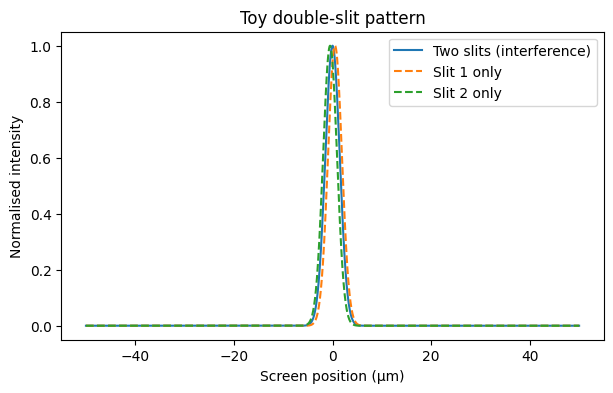

In [2]:
# Example B — 1D double-slit interference (toy model)
# This is a simple, didactic amplitude model in one dimension across a screen.

import numpy as np
import matplotlib.pyplot as plt

# Geometry (arbitrary but reasonable units)
wavelength = 5e-10         # 0.5 nm (electron-like)
k = 2*np.pi / wavelength
screen_z = 1.0             # distance to screen
slit_sep = 1e-6            # slit separation
sigma = 2e-6               # slit width parameter for Gaussian envelope

# Screen coordinates
x = np.linspace(-50e-6, 50e-6, 4000)

# Path lengths from each slit aperture (approximate Fraunhofer)
r1 = np.sqrt((x - slit_sep/2)**2 + screen_z**2)
r2 = np.sqrt((x + slit_sep/2)**2 + screen_z**2)

# Complex amplitudes from two slits with Gaussian weighting
A1 = np.exp(-((x - slit_sep/2)**2)/(2*sigma**2)) * np.exp(1j*k*r1) / r1
A2 = np.exp(-((x + slit_sep/2)**2)/(2*sigma**2)) * np.exp(1j*k*r2) / r2

# Relative phase knob (try 0, np.pi/2, np.pi)
phi = 0.0
psi = A1 + np.exp(1j*phi)*A2
I_interf = (psi * np.conj(psi)).real  # |psi|^2

# "One-slit" controls (block one slit)
I_slit1 = (A1*np.conj(A1)).real
I_slit2 = (A2*np.conj(A2)).real

# Plot
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x*1e6, I_interf/np.max(I_interf), label="Two slits (interference)")
ax.plot(x*1e6, I_slit1/np.max(I_slit1), linestyle="--", label="Slit 1 only")
ax.plot(x*1e6, I_slit2/np.max(I_slit2), linestyle="--", label="Slit 2 only")
ax.set_xlabel("Screen position (µm)")
ax.set_ylabel("Normalised intensity")
ax.set_title("Toy double-slit pattern")
ax.legend()
plt.show()

In [3]:
# Example C — Superposition vs mixture on a qubit (density matrices)
# We show how off-diagonal terms (coherence) vanish in a mixture.

import numpy as np

# |+> = (|0> + |1>) / sqrt(2)
ket_plus = (1/np.sqrt(2)) * np.array([[1.0],[1.0]], dtype=complex)
rho_superposition = ket_plus @ ket_plus.conj().T  # |+><+|

# Mixture: 50% |0>, 50% |1>
proj0 = np.array([[1,0],[0,0]], dtype=complex)
proj1 = np.array([[0,0],[0,1]], dtype=complex)
rho_mixture = 0.5*proj0 + 0.5*proj1

print("ρ_superposition =\n", rho_superposition)
print("\nρ_mixture =\n", rho_mixture)
print("\nOff-diagonals (coherence) → superposition has them, mixture does not.")


ρ_superposition =
 [[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

ρ_mixture =
 [[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]

Off-diagonals (coherence) → superposition has them, mixture does not.


### Discussion of the examples
- **Example A:** $\lambda=h/p$ shows why wave effects are huge for electrons and negligible for cats.  
- **Example B:** interference vanishes if you block one slit, or if any which-path information leaks to the environment (decoherence).  
- **Example C:** only the superposition has off-diagonal coherence. If you randomise the relative phase (due to environment), those terms average to zero → mixture.


## 3. Key equations and statements
- **de Broglie:** $\lambda=\dfrac{h}{p}=\dfrac{h}{mv}.$
- **Time-dependent Schrödinger equation (single particle):**  
  $$i\hbar\,\frac{\partial}{\partial t}\psi(\mathbf r,t)=\hat H\,\psi(\mathbf r,t).$$
- **Born rule:** detection probability density is $|\psi(\mathbf r,t)|^2$.
- **Two-path interference (toy):**  
  If $\psi=\psi_1+\psi_2$, then  
  $$|\psi|^2=|\psi_1|^2+|\psi_2|^2+2\operatorname{Re}\left(\psi_1\psi_2^\ast\right).$$
  The last term is the interference term that requires phase coherence.


## 4. Schrödinger’s cat, carefully
- The “cat is alive+dead” line is a **paradox prompt**, not lab practice.  
- In reality, the cat, air, box, and Geiger counter interact strongly, causing **rapid decoherence** that selects an effectively classical outcome long before you open the box.  
- Modern view: the measurement problem is about when and how quantum probabilities become classical records; decoherence explains why macroscopic superpositions are not observed, though interpretations still differ.


## 5. Try it yourself
1) **Phase control:** In Example B, set `phi=np.pi/2`. How does the pattern shift?  
2) **Which-path info:** Zero out the cross-term by randomising `phi` over many trials and averaging $|\psi|^2$. Observe interference wash out.  
3) **Visibility vs slit width:** Change `sigma` and `slit_sep` to see fringe spacing and contrast trade-offs.  
4) **From superposition to mixture:** In Example C, average $|+\rangle$ over random phase $e^{i\theta}$ and show off-diagonals vanish.  
5) **Estimate λ:** Pick your own mass and speed, compute $\lambda$, and argue whether any lab could see interference.


## 4. Reflection
- In one paragraph, what surprised you today about **The Bloch Sphere**?
- Where did you struggle and how did you resolve it?
- What is one question you still have?


## 6. Reflection
- In one paragraph, explain to your future self why **superposition ≠ “50-50 ignorance”**.  
- What convinces you that detection is probabilistic while propagation is wave-like?  
- Where do you expect decoherence to matter in quantum technologies you care about?


---
### Links
- **Open in Colab (from GitHub):** replace `YOUR_GITHUB_USERNAME/qucode-21days`
  - `https://colab.research.google.com/github/YOUR_GITHUB_USERNAME/qucode-21days/blob/main/Day03_The_Bloch_Sphere.ipynb.ipynb`
- **Report an issue / suggest a fix:** link to your repo issues page
